<a href="https://colab.research.google.com/github/phijopho/Autovermietung/blob/main/Lichess1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json

# For later modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [8]:
# Define a function to fetch data from the Lichess API
def fetch_lichess_games(username, max_games=50):
    """
    Fetches game data for a given Lichess user.
    Note: The Lichess API endpoint may require additional parameters or authentication.
    """
    # Example endpoint URL; adjust parameters as needed.
    url = f"https://lichess.org/api/games/user/{username}?max={max_games}&moves=false&tags=false&clocks=false"
    headers = {'Accept': 'application/x-ndjson'}

    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        # The response is in NDJSON format (each line is a JSON object)
        games = [json.loads(line) for line in response.text.splitlines() if line]
        return games
    else:
        raise Exception(f"Error fetching data: {response.status_code}")

# Example: Fetch games for a sample user (replace 'sample_username' with a real username)
try:
    games_data = fetch_lichess_games("PhilippSpiegel", max_games=200)
    print(f"Fetched {len(games_data)} games.")
except Exception as e:
    print(e)

Fetched 200 games.


In [9]:
# Convert the fetched data into a DataFrame
# For demonstration, let's extract some key fields:
# - 'players' to get rating information
# - 'winner' to determine the outcome

def parse_game_data(games):
    records = []
    for game in games:
        # Example extraction; actual keys depend on the API response structure
        try:
            white_rating = game['players']['white']['rating']
            black_rating = game['players']['black']['rating']
            result = game.get('winner', None)  # could be 'white', 'black', or None for draw
            # For our target variable, assume:
            # If you are white, win=1 if winner == 'white'; if you are black, win=1 if winner == 'black'
            # Here, we'll store the result as is and later set up the target accordingly.
            records.append({
                'white_rating': white_rating,
                'black_rating': black_rating,
                'winner': result
            })
        except Exception as ex:
            print("Skipping a game due to missing data:", ex)
    return pd.DataFrame(records)

df_games = parse_game_data(games_data)
print(df_games.head())

   white_rating  black_rating winner
0          1500          1513  white
1          1487          1494  black
2          1723          1719  black
3          1773          1728  white
4          1722          1713  white


   white_rating  black_rating  rating_diff  white_win
0          1500          1513          -13        1.0
1          1487          1494           -7        0.0
2          1723          1719            4        0.0
3          1773          1728           45        1.0
4          1722          1713            9        1.0


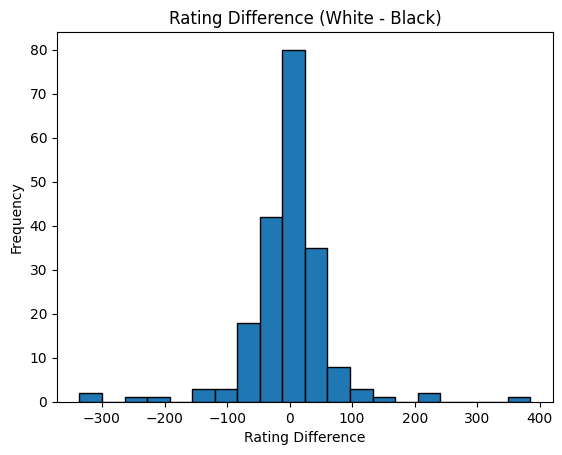

In [10]:
# Data Exploration and Feature Engineering

# Let's create a new feature: rating difference (white_rating - black_rating)
df_games['rating_diff'] = df_games['white_rating'] - df_games['black_rating']

# Define the target variable.
# For demonstration, assume we want to predict the outcome for the white player:
# If 'winner' is 'white' then win=1, if 'black' then win=0. (Draws can be handled later.)
df_games['white_win'] = df_games['winner'].apply(lambda x: 1 if x=='white' else (0 if x=='black' else None))

print(df_games[['white_rating', 'black_rating', 'rating_diff', 'white_win']].head())

# Visualize the rating difference distribution
plt.hist(df_games['rating_diff'], bins=20, edgecolor='black')
plt.title("Rating Difference (White - Black)")
plt.xlabel("Rating Difference")
plt.ylabel("Frequency")
plt.show()

In [11]:
# Preparing Data for Modeling

# Remove rows with draws (None in white_win) or missing target values
df_model = df_games.dropna(subset=['white_win'])

# Define features and target
features = ['rating_diff']  # You can add more features later (e.g., recent performance metrics)
X = df_model[features]
y = df_model['white_win']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 156
Testing samples: 39


In [12]:
# Build and Train a Logistic Regression Model

model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities and classes
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred_class = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Accuracy:", accuracy)
print("ROC-AUC:", roc_auc)

Accuracy: 0.48717948717948717
ROC-AUC: 0.4074074074074074


In [13]:
echo "# Lichess_WinPredictor" >> README.md
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin git@github.com:phijopho/Lichess_WinPredictor.git
git push -u origin main

SyntaxError: invalid syntax (<ipython-input-13-d025c67df61c>, line 1)